In [6]:
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("C:/Users/rinar/Documents/Master_Thesis/VizWindfarms_Project/data/data_processed_full.csv")

rel_data = data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]]
cols = ["#51CF7F","#CF4F75"]

wf_data= pd.read_csv("C:/Users/rinar/Documents/Master_Thesis/VizWindfarms_Project/data/wf_data_final.csv")
wf_data = wf_data.replace("unknown", pd.NA)
wt_data= pd.read_csv("C:/Users/rinar/Documents/Master_Thesis/VizWindfarms_Project/data/wt_data_final.csv")
wt_data = wt_data.replace("unknown", pd.NA)




C:\Users\rinar\AppData\Local\Temp\ipykernel_10088\1416021932.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/rinar/Documents/Master_Thesis/VizWindfarms_Project/data/data_processed_full.csv")


In [21]:
wf_data.isnull().sum()/359947
# wf_data


WFid                  0.000000
lon                   0.000000
lat                   0.000000
Turbine Spacing       0.000000
Elevation             0.000000
Country               0.000008
Continent             0.000008
Land Cover            0.000011
Landform              0.000114
Number of turbines    0.000000
Shape                 0.000000
popup                 0.000000
dtype: float64

Missing data OSM tags from raw data

<AxesSubplot:>

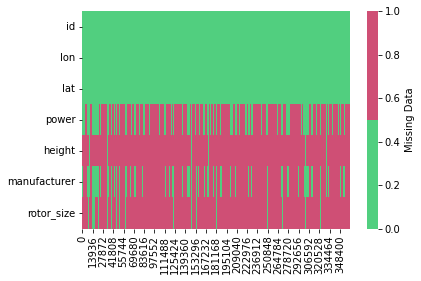

In [52]:
# msno.bar(data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]], fontsize=18, color="#65BB95")
# plot_nas(data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]])
# plt.figure(figsize=(10,6))
sns.heatmap(rel_data.isna().transpose(),
            cmap=cols,
            cbar_kws={'label': 'Missing Data'})
# plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

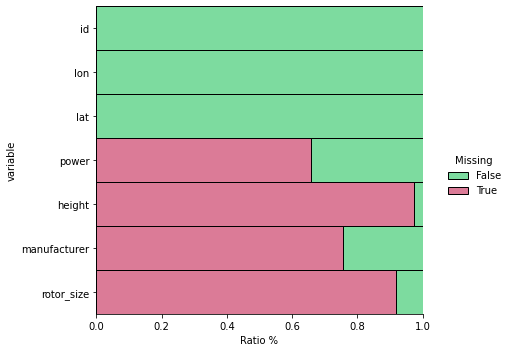

In [6]:
# plt.figure(figsize=(10,6))
g2 = sns.displot(
    data=rel_data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    aspect=1.25, 
    palette=cols
)
g2.set_axis_labels("Ratio", "variable")
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

Missing data finl wt data

<AxesSubplot:>

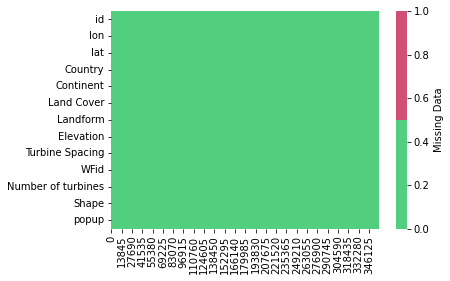

In [2]:
# msno.bar(data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]], fontsize=18, color="#65BB95")
# plot_nas(data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]])
# plt.figure(figsize=(10,6))
sns.heatmap(wt_data.isna().transpose(),
            cmap=cols,
            cbar_kws={'label': 'Missing Data'})
# plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

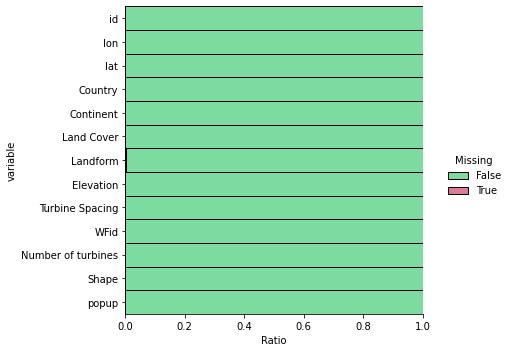

In [3]:
# plt.figure(figsize=(10,6))
g2 = sns.displot(
    data=wt_data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    aspect=1.25, 
    palette=cols
)
g2.set_axis_labels("Ratio", "variable")
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

Missinf WF data

<AxesSubplot:>

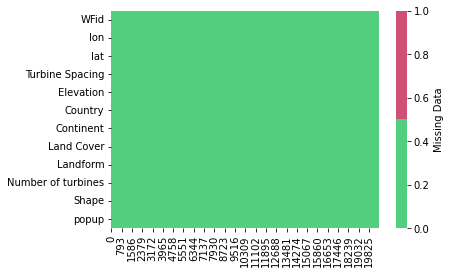

In [5]:
# msno.bar(data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]], fontsize=18, color="#65BB95")
# plot_nas(data[["id", "lon", "lat", "power", "height", "manufacturer", "rotor_size"]])
# plt.figure(figsize=(10,6))
sns.heatmap(wf_data.isna().transpose(),
            cmap=cols,
            cbar_kws={'label': 'Missing Data'})
# plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

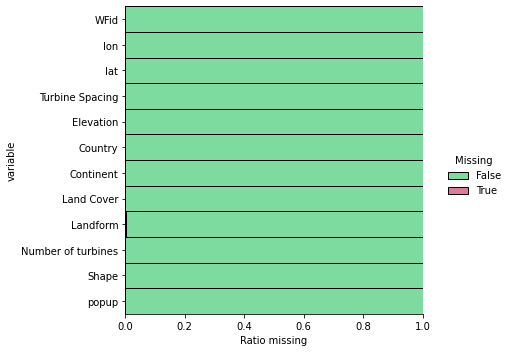

In [6]:
# plt.figure(figsize=(10,6))
g2 = sns.displot(
    data=wf_data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    aspect=1.25, 
    palette=cols
)
g2.set_axis_labels("Ratio missing", "variable")
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [7]:
# distanceDF_full = pd.read_csv("data/data_processed_full.csv")

data_nn = pd.read_csv("data/data_processed_withCloseTurbine_new.csv")
# data_nn["color"] = 
fig = px.histogram(data_nn["distance"], nbins = 1000, color_discrete_sequence=["#65BB95"])
fig.update_layout(title_text = "Distance to nearest neighbor for turbines with neighboring turbines within a radius of 500 meters",
showlegend = False)
fig.update_xaxes(title = "Turbine spacing (m)", tick0 = 0,
        dtick = 20)
fig.update_yaxes(title = "Count of turbines")
fig.add_vline(x=10, line_width=2, line_dash="dash", line_color="green")
fig.show()

In [8]:
import pycountry_convert as pc
import plotly.graph_objects as go

data.loc[data["country"] != "unknown", "Country"] = data.loc[data["country"] != "unknown", "country"].apply(pc.country_name_to_country_alpha3)# pc.country_name_to_country_alpha3(data["country"].values)


In [9]:
data_missing_global = data.groupby("Country")[["power", "height", "manufacturer", "rotor_size"]].apply(lambda x: 100-x.isna().sum()/len(x)*100).reset_index()
data_missing_global

Country       power    height  manufacturer  rotor_size
0       ABW  100.000000  0.000000    100.000000    0.000000
1       AFG    0.000000  0.000000      0.000000    0.000000
2       ALA    0.000000  0.000000      0.000000    0.000000
3       ARG   41.711230  0.000000      1.711230   16.898396
4       ARM   80.000000  0.000000     80.000000    0.000000
..      ...         ...       ...           ...         ...
151     VIR    0.000000  0.000000      0.000000    0.000000
152     VNM   57.706093  2.150538     39.784946    6.093190
153     VUT    0.000000  0.000000      0.000000    0.000000
154     WSM    0.000000  0.000000      0.000000    0.000000
155     ZAF   16.052227  0.000000      0.230415    0.000000

[156 rows x 5 columns]

In [10]:
fig = go.Figure(data=go.Choropleth(
    locations = data_missing_global['Country'],
    z = data_missing_global['power'],
    text = data_missing_global['Country'],
    colorscale = 'Emrld',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '% available data'
    
))
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Power</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    annotations = [dict(
        x=0.55,
        y=1,
        xref='paper',
        yref='paper',
        text='Missing values for OpenStreetMap tags by country',
        showarrow = False
    )]


)
fig.show()

In [11]:
fig = go.Figure(data=go.Choropleth(
    locations = data_missing_global['Country'],
    z = data_missing_global['height'],
    text = data_missing_global['Country'],
    colorscale = 'Emrld',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '% available data'
    
))
fig.update_layout(title = "Hub height")
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Hub height</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    annotations = [dict(
        x=0.55,
        y=1,
        xref='paper',
        yref='paper',
        text='Missing values for OpenStreetMap tags by country',
        showarrow = False
    )]

)
fig.show()

In [12]:
fig = go.Figure(data=go.Choropleth(
    locations = data_missing_global['Country'],
    z = data_missing_global['manufacturer'],
    text = data_missing_global['Country'],
    colorscale = 'Emrld',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '% available data'
    
))
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Manufacturer</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    annotations = [dict(
        x=0.55,
        y=1,
        xref='paper',
        yref='paper',
        text='Missing values for OpenStreetMap tags by country',
        showarrow = False
    )]

)
fig.show()

In [13]:
fig = go.Figure(data=go.Choropleth(
    locations = data_missing_global['Country'],
    z = data_missing_global['rotor_size'],
    text = data_missing_global['Country'],
    colorscale = 'Emrld',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '% available data'
    
))
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Rotor diameter</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    annotations = [dict(
        x=0.55,
        y=1,
        xref='paper',
        yref='paper',
        text='Missing values for OpenStreetMap tags by country',
        showarrow = False
    )]

)
fig.show()

In [14]:
data_count= data.groupby("Country")["country"].count().reset_index()
fig = go.Figure(data=go.Choropleth(
    locations = data_count['Country'],
    z = data_count['country'],
    text = data_count['Country'],
    colorscale = 'Emrld',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Count'
    
))
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Number of data points per country</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    annotations = [dict(
        x=0.55,
        y=1,
        xref='paper',
        yref='paper',
        text='Source: OpenStreetMap Data',
        showarrow = False
    )]

)
fig.show()

In [167]:
data_full_power = data[~data["power"].isnull()]
power_is_kW = data_full_power[data_full_power['power'].str.contains('kW')]
power_is_MW = data_full_power[data_full_power['power'].str.contains('MW')]
# power_is_kW.describe
# data_full_power

In [ ]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

# "kW"  is in data_full_power.powerä
power_is_kW.loc[:,"power"]= power_is_kW.loc[:,"power"].str.replace("kW", "")
power_is_MW.loc[:,"power"] = power_is_MW.loc[:,"power"].str.replace("MW", "")
power_is_kW.loc[:,"power"]= power_is_kW.loc[:,"power"].str.replace(" ", "")
power_is_MW.loc[:,"power"] = power_is_MW.loc[:,"power"].str.replace(" ", "")
power_data_kW = power_is_kW[power_is_kW['power'].apply(isfloat)]
power_data_MW = power_is_MW[power_is_MW['power'].apply(isfloat)]
power_data_kW["power"] = pd.to_numeric(power_data_kW["power"]).div(1000)
power_data_MW["power"] = pd.to_numeric(power_data_MW["power"])

data_plt_power = power_data_MW.append(power_data_kW)

data_plt_power.to_csv("data/full_power_data.csv")

In [181]:

data_full_rotorsize = data[~data["rotor_size"].isnull()]
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

# "kW"  is in data_full_power.powerä
data_full_rotorsize.loc[:,"rotor_size"]= data_full_rotorsize.loc[:,"rotor_size"].str.replace("m", "")
data_full_rotorsize.loc[:,"rotor_size"]= data_full_rotorsize.loc[:,"rotor_size"].str.replace(" ", "")
data_full_rotorsize = data_full_rotorsize[data_full_rotorsize['rotor_size'].apply(isfloat)]

data_full_rotorsize.to_csv("data/full_rotor_size_data.csv")

C:\Users\rinar\AppData\Local\Temp\ipykernel_8244\3446554909.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rinar\AppData\Local\Temp\ipykernel_8244\3446554909.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
import random
from random import sample
from plotly.subplots import make_subplots
from helpfile import *

plot_rows = 14
plot_col = 10 

# Draw random sample
wfids = wt_data.WFid.unique().tolist()
random.seed(43) # set seed for reproducibility in drawing sample 
random_wfs_ids = sample(wfids,plot_rows*plot_col)

# Create subplot figure and set common map layer
fig = make_subplots(rows=plot_rows, cols=plot_col, horizontal_spacing = 0.01, vertical_spacing = 0.02)

fig.update_layout(
    title = "Random Wind Farms" ,
    showlegend=False, 
    )


x = 0
# Loop over each wind farm and fill row and columns wise 
for i in range(1, plot_rows + 1):
    for j in range(1, plot_col + 1):
        current_wfid = random_wfs_ids[x]
        current_wf = wt_data[wt_data["WFid"] == current_wfid]
        current_wf_proj = proj_to_wf_center(current_wf)
        fig.add_trace(go.Scatter(x = current_wf_proj.loc[0], y = current_wf_proj.loc[1], mode='markers'), row=i, col=j)
        x=x+1


fig.update_layout(
    width = 755, 
    height = 1096
)
fig.show()




c:\Users\rinar\Documents\Master_Thesis\VizWindfarms_Project\python\helpfile.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\rinar\Documents\Master_Thesis\VizWindfarms_Project\python\helpfile.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\rinar\Anaconda3\envs\ThesisEnv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis orde

In [183]:

# Loop over each wind farm and fill row and columns wise 
for i in range(1, plot_rows + 1):
    for j in range(1, plot_col + 1):
        #update common attributes:

        # Get wind farms through random ids sample
        current_wfid = random_wfs_ids[x]
        current_wf = clustered_data[clustered_data["WFid"] == current_wfid]


        # Retrieve central loaction and zoom level of scattermapbox plot and add to list
        zoom, center = zoom_center(bbox_buff)
        centers.append(center)
        zooms.append(zoom)

        # Retrieve all turbines in bounding box of +- 1° longitudinale/latitudinal
        ll = np.array([(center["lat"]-1), (center["lon"]-1)])  # lower-left
        ur = np.array([(center["lat"]+1), (center["lon"]+1)])  # upper-right
        inidx = np.all(np.logical_and(ll <= clustered_data[["lat", "lon"]], clustered_data[["lat", "lon"]] <= ur), axis=1)
        data_in_box = clustered_data[inidx]
        data_in_box["group"] = 0

        # color for turbines contained in farm: red
        # for remaining turbines in bounding box: orange 
        data_in_box.loc[data_in_box["WFid"].isin([current_wfid]),"group"] = "#FF0000"
        data_in_box.loc[~data_in_box["WFid"].isin([current_wfid]),"group"] = "#FFC000"
        
        # Create plot of single wind farm and add as trace to subplot figure
        fig.add_trace(go.Scattermapbox(
            lon=list(data_in_box["lon"]),
            lat=list(data_in_box["lat"]), 
            mode='markers', 
            name='',
            marker=dict(color=data_in_box["group"]), 
            text = ["test"],
            hovertemplate = [f'Windfarm ID: {string1}<br>Turbine Spacing (m): {string2}<br>Number of turbines: {string3}<br>Elevation (m): {string4}<br>Land Cover: {string5}<br>Landform: {string6}<br>Country: {string7}<br>Continent: {string8}<br>Shape: {string9}'
                for string1, string2, string3, string4, string5, string6, string7, string8, string9 in zip(data_in_box["WFid"], data_in_box["Turbine Spacing"], data_in_box["Number of turbines"], data_in_box["Elevation"], data_in_box["Land Cover"], data_in_box["Landform"], data_in_box["Country"],data_in_box["Continent"],  data_in_box["Shape"])]
        ), row=i, col=j)

        x=x+1


# Adjust figure layout 
temp= min(plot_rows, plot_col)
fig.update_layout(
    height = 300+temp*150, 
    width = 400+temp*150, 
    autosize = True, 
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='#F4F4F4', 
    margin = {'r':0,'t':0,'l':0,'b':0}, 
    hoverlabel=dict(
        bgcolor="#AEDCC8",
        font_size=11,
        font_family='Montserrat, sans-serif'
    )
)
# Update grid layers of figures 
for m, g in zip(fig.data, grids):
    exec("fig.update_layout("+ str(m.subplot) 
    + "=dict(layers=[dict(sourcetype = 'geojson',source ="
    +str(g) + ",type = 'line', color = '#454545',opacity = 0.2,line=dict(width=1))]))")
            
# Update centers of figures 
for m, c in zip(fig.data, centers):
    exec("fig.layout." + m.subplot+"[\"center\"] = " + str(c))
# Update centers of figures 
for m, z in zip(fig.data, zooms):
    exec("fig.layout." + m.subplot+"[\"zoom\"] = " + str(z))

Unnamed: 0       t        lon        lat          id  power height  \
50              50      50  -1.851090  42.412673    26506380    1.5    NaN   
51              51      51  -1.857169  42.409847    26536267    1.5    NaN   
52              52      52  -0.985582  51.418656    27016257    2.0    NaN   
70              70      70  12.925792  52.579289    33062901    1.5    NaN   
76              76      76  13.590464  52.618545    33965037    3.0   141m   
...            ...     ...        ...        ...         ...    ...    ...   
357509      357509  357509  11.434891  52.160193  9857774293    2.0     95   
357510      357510  357510  11.430403  52.160454  9857774294    2.0     95   
357511      357511  357511  11.425851  52.162707  9857774295    2.0     95   
359552      359552  359552   6.516340  49.187395  9904258604    2.5    NaN   
360033      360033  360033  13.916681  42.270153  9928835830    0.8    NaN   

          manufacturer rotor_size     lon_proj     lat_proj         country  \
50             Acciona         77  -155.018142  5276.850165           Spain   
51             Acciona         77  -155.529833  5276.541386           Spain   
52                 NaN        NaN   -77.777466  6211.812020  United Kingdom   
70      GE Wind Energy        NaN  1011.114313  6324.509183         Germany   
76              Vestas       112m  1062.786822  6328.286975         Germany   
...                ...        ...          ...          ...             ...   
357509          Vestas         80   897.361874  6284.038184         Germany   
357510          Vestas         80   897.007895  6284.063447         Germany   
357511          Vestas         80   896.635307  6284.281682         Germany   
359552          Nordex         90   522.604298  5989.860935          France   
360033             NaN        NaN  1166.401202  5261.268456           Italy   

       Country continent  land_coverage land_cover_name  landform  \
50         NaN    Europe           40.0     Agriculture      24.0   
51         NaN    Europe           40.0     Agriculture      22.0   
52         NaN    Europe           50.0           Urban      32.0   
70         NaN    Europe           40.0     Agriculture      24.0   
76         NaN    Europe           40.0     Agriculture      34.0   
...        ...       ...            ...             ...       ...   
357509     NaN    Europe           40.0     Agriculture      24.0   
357510     NaN    Europe           40.0     Agriculture      24.0   
357511     NaN    Europe           40.0     Agriculture      24.0   
359552     NaN    Europe           40.0     Agriculture      22.0   
360033     NaN    Europe           40.0     Agriculture      22.0   

             landform_name  distance  
50      Upper slope (flat)     120.0  
51             Upper slope     109.0  
52             Lower slope       NaN  
70      Upper slope (flat)     518.0  
76      Lower slope (flat)     316.0  
...                    ...       ...  
357509  Upper slope (flat)     308.0  
357510  Upper slope (flat)     308.0  
357511  Upper slope (flat)     400.0  
359552         Upper slope     415.0  
360033         Upper slope     484.0  

[124059 rows x 19 columns]